# BUS32120 Week 3 in-class exercise

Import the Iowa school district expenditures csv from Canvas. Then, working alone or with people around you: 

1. Create at least two charts
2. Create at least two tables 
3. Create any other useful EDA (exploratory data analysis)

Hints: 
* There are two versions of the csv, raw and fixed. The raw version is as I downloaded it from the website and the numbers will import as strings (they have commas in them). If you'd like an extra challenge, work with the raw csv and figure out how to cast them to numbers! You may have to google to find out how to remove the commas (I will share that code in a few days, once everyone's had a shot to attempt it). The "fixed" version has been changed to remove the commas and the numbers will import as numbers with no extra work.
* If you need more info on the data, it came from here: https://data.iowa.gov/School-Finance/Iowa-School-District-Expenditures-by-Fiscal-Year/uutu-bzs3
* What's the min, max and median for numeric columns? Is there an easy way to get the seven number statistical summary for every numeric column in a Pandas dataframe? Hmmm
* Think of ways to use `groupby`

... the rest of this notebook is left intentionally blank! This is how your midterm and final will look. It's also how your work in the real world will look. I don't want you to be scared of a blank Jupyter notebook, so Jian/Brandon and I will walk around to help you get started. 

In [54]:
# write some code here :)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



In [55]:
Iowa_data = pd.read_csv('Iowa_School_District_Expenditures_by_Fiscal_Year-EASY.csv')


In [56]:
Iowa_data.head(10)

,FiscalYear,Actual_ReEstimated_Budget,AEA,Dist,DE_District,District Name,Column Name,Fund,Source,Expenditures Per Pupil,Amount,Enrollment Category,Enrollment Category Number
0,2017,Actual,7,9,9,AGWSR,geninstr,General,Instruction,7989,4997256,600-999,3
1,2017,Actual,7,9,9,AGWSR,actinstr,Activity,Instruction,270,169031,600-999,3
2,2017,Actual,7,9,9,AGWSR,mgmntinstr,Management,Instruction,244,152484,600-999,3
3,2017,Actual,7,9,9,AGWSR,perlinstr,PERL,Instruction,0,0,600-999,3
4,2017,Actual,7,9,9,AGWSR,entreinstr,Entrepreneurial_Reorganization,Instruction,0,0,600-999,3
5,2017,Actual,7,9,9,AGWSR,emglevyinstr,Emergency_Disaster,Instruction,0,0,600-999,3
6,2017,Actual,7,9,9,AGWSR,saveinstr,Sales Tax,Instruction,0,0,600-999,3
7,2017,Actual,7,9,9,AGWSR,ppelinstr,PPEL,Instruction,5,3100,600-999,3
8,2017,Actual,7,9,9,AGWSR,capprojinstr,Other Capital Projects,Instruction,0,0,600-999,3
9,2017,Actual,7,9,9,AGWSR,debtinstr,Debt Service,Instruction,0,0,600-999,3


In [57]:
Iowa_data.columns

Index(['FiscalYear', 'Actual_ReEstimated_Budget', 'AEA', 'Dist', 'DE_District',
       'District Name', 'Column Name', 'Fund', 'Source',
       'Expenditures Per Pupil', 'Amount', 'Enrollment Category',
       'Enrollment Category Number'],
      dtype='object')

If you complete the above and need more practice, do the same thing on the [Iowa unemployment insurance payments](https://data.iowa.gov/Economic-Statistics/Iowa-Unemployment-Insurance-Benefit-Payments-and-R/aeyn-twxp) dataset (on Canvas).

In [58]:
Iowa_data.sample(10)

,FiscalYear,Actual_ReEstimated_Budget,AEA,Dist,DE_District,District Name,Column Name,Fund,Source,Expenditures Per Pupil,Amount,Enrollment Category,Enrollment Category Number
40179,2017,Actual,5,5283,5283,Pocahontas Area,perlinstrsupp,PERL,Instructional Staff Support Services,0,0,600-999,3
237948,2021,Actual,7,1044,1044,Cedar Falls,capprojtransp,Other Capital Projects,Student Transportation,0,0,"2,500-7,499",5
278793,2021,Actual,10,6138,6138,Springville,debtopermtnc,Debt Service,Plant Operation and Maintenance,0,0,300-599,2
82131,2018,Actual,15,3312,3312,Keokuk,perlotherfin,PERL,Transfers Out/Special Items/Down Adj,0,0,"1,000-2,499",4
123458,2019,Actual,7,1215,1215,Clarksville,mgmnttransp,Management,Student Transportation,39,12098,300-599,2
317725,2022,Actual,13,3645,3645,Lewis Central,entdebtserv,Enterprise,"Debt Service (Principal, interest, fiscal char...",0,0,"2,500-7,499",5
262173,2021,Actual,15,4203,4203,Mediapolis,capprojstudsupp,Other Capital Projects,Student Support Services,0,0,600-999,3
333876,2022,Actual,15,5895,5895,Seymour,debtopermtnc,Debt Service,Plant Operation and Maintenance,0,0,<300,1
166962,2019,Actual,10,6930,6930,West Branch,perlinstrsupp,PERL,Instructional Staff Support Services,0,0,600-999,3
331411,2022,Actual,5,5323,5325,Prairie Valley,ppelaeaflow,PPEL,AEA Support - Direct to AEA,0,0,300-599,2


In [59]:
#fund, #amount
Iowa_data[Iowa_data.Amount > 0 ].sample(10)

,FiscalYear,Actual_ReEstimated_Budget,AEA,Dist,DE_District,District Name,Column Name,Fund,Source,Expenditures Per Pupil,Amount,Enrollment Category,Enrollment Category Number
190508,2020,Actual,11,2151,2151,Exira-Elk Horn-Kimballton,ppelendfb,PPEL,Ending Fund Balance,2773,1156097,300-599,2
90120,2018,Actual,1,4662,4662,New Hampton,genopermtnc,General,Plant Operation and Maintenance,885,851649,600-999,3
115738,2019,Actual,13,387,387,Atlantic,lunchnoninstr,Nutrition,Noninstructional Programs,649,862979,"1,000-2,499",4
197954,2020,Actual,11,3231,3231,Johnston,mgmntcentraladmin,Management,Business & Central Administration,2,11210,"2,500-7,499",5
76723,2018,Actual,7,2502,2502,Gladbrook-Reinbeck,ppelfacacq,PPEL,Facilities Acquisition and Construction,27,15283,300-599,2
46262,2017,Actual,5,6102,6102,Spencer,mgmntcentraladmin,Management,Business & Central Administration,4,7566,"1,000-2,499",4
53424,2017,Actual,7,5922,5922,West Fork,geninstr,General,Instruction,8802,5951034,600-999,3
93494,2018,Actual,11,4797,4797,Norwalk,mgmnttransp,Management,Student Transportation,14,38114,"2,500-7,499",5
326619,2022,Actual,11,4779,4779,North Polk,geninstrsupp,General,Instructional Staff Support Services,736,1432498,"1,000-2,499",4
70725,2018,Actual,12,1701,1701,Denison,debtendfb,Debt Service,Ending Fund Balance,205,422713,"1,000-2,499",4


In [60]:
# multiple criteria 
#mask = (df.calories > 100) & (df.sugars < 8) & ((df.mfr == 'K') | (df.mfr == 'G')) 

In [61]:
Iowa_data.describe()

,FiscalYear,AEA,Dist,DE_District,Expenditures Per Pupil,Amount,Enrollment Category Number
count,347832.000000,347832.000000,347832.000000,347832.000000,347832.000000,3.478320e+05,347832.000000
mean,2019.529911,9.531705,3628.318292,3641.813082,153.477294,2.137606e+05,2.934003
std,1.702426,3.710020,2183.755655,2193.183393,861.769623,2.383155e+06,1.264738
min,2017.000000,1.000000,9.000000,9.000000,-2505.000000,-3.530825e+06,1.000000
25%,2018.000000,7.000000,1619.000000,1619.000000,0.000000,0.000000e+00,2.000000
50%,2020.000000,10.000000,3645.000000,3691.000000,0.000000,0.000000e+00,3.000000
75%,2021.000000,12.000000,5697.000000,5751.000000,0.000000,0.000000e+00,4.000000
max,2022.000000,15.000000,7110.000000,7110.000000,41821.000000,2.765440e+08,6.000000


In [62]:
Iowa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347832 entries, 0 to 347831
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   FiscalYear                  347832 non-null  int64 
 1   Actual_ReEstimated_Budget   347832 non-null  object
 2   AEA                         347832 non-null  int64 
 3   Dist                        347832 non-null  int64 
 4   DE_District                 347832 non-null  int64 
 5   District Name               347832 non-null  object
 6   Column Name                 347832 non-null  object
 7   Fund                        347832 non-null  object
 8   Source                      347832 non-null  object
 9   Expenditures Per Pupil      347832 non-null  int64 
 10  Amount                      347832 non-null  int64 
 11  Enrollment Category         347832 non-null  object
 12  Enrollment Category Number  347832 non-null  int64 
dtypes: int64(7), object(6)
memory

In [63]:
Iowa_data.groupby('FiscalYear').Amount.sum()

FiscalYear
2017    10914543791
2018    11039306387
2019    11848065392
2020    12485455146
2021    13622518335
2022    14442904599
Name: Amount, dtype: int64

In [64]:
fiscal_year_sums = Iowa_data.groupby('FiscalYear').Amount.sum().reset_index()

Text(0, 0.5, 'Expenditure')

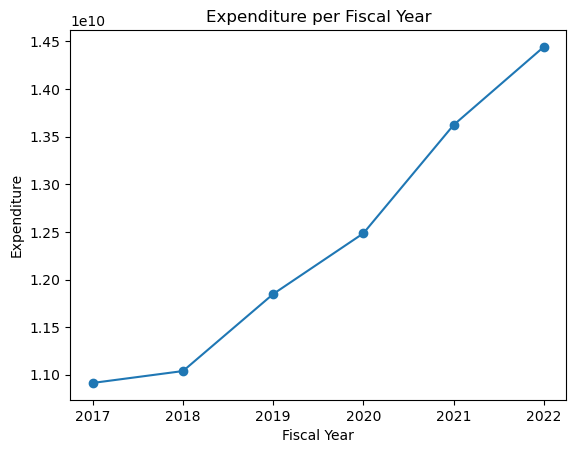

In [65]:
plt.plot(fiscal_year_sums['FiscalYear'], fiscal_year_sums['Amount'], marker='o', linestyle='-')
plt.title('Expenditure per Fiscal Year');
plt.xlabel('Fiscal Year')
plt.ylabel('Expenditure')

Implications of this data: the expenditure per fiscal year tends to increase over the years. 

In [66]:
Amount_by_Source = Iowa_data.groupby('Source').Amount.sum().reset_index()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'AEA Support - Direct to AEA'),
  Text(1, 0, 'Business & Central Administration'),
  Text(2, 0, 'Debt Service (Principal, interest, fiscal charges)'),
  Text(3, 0, 'Ending Fund Balance'),
  Text(4, 0, 'Facilities Acquisition and Construction'),
  Text(5, 0, 'General Administration'),
  Text(6, 0, 'Instruction'),
  Text(7, 0, 'Instructional Staff Support Services'),
  Text(8, 0, 'Noninstructional Programs'),
  Text(9, 0, 'Plant Operation and Maintenance'),
  Text(10, 0, 'School/Building Administration'),
  Text(11, 0, 'Student Support Services'),
  Text(12, 0, 'Student Transportation'),
  Text(13, 0, 'Transfers Out'),
  Text(14, 0, 'Transfers Out/Special Items/Down Adj')])

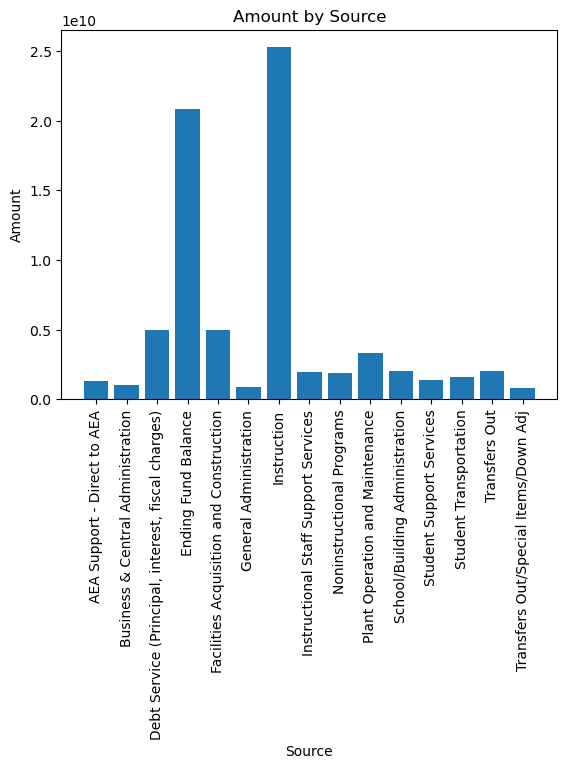

In [67]:
plt.bar(Amount_by_Source['Source'], Amount_by_Source['Amount'])
plt.xlabel('Source')
plt.ylabel('Amount')
plt.title('Amount by Source')
plt.xticks(rotation=90)

Implication: The Iowa School District has spent most money on Ending Fund Balance and instructions. 

Text(0, 0.5, 'Expenditure')

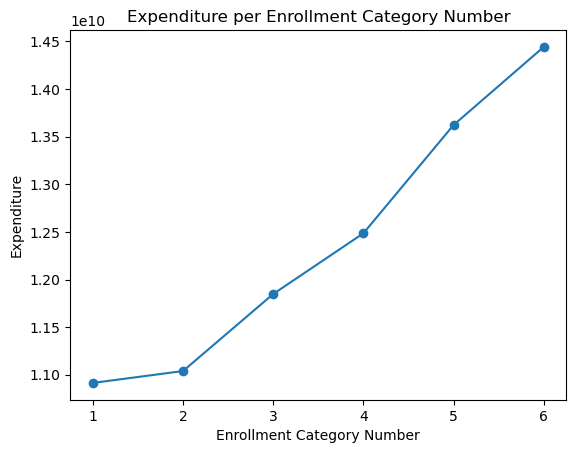

In [68]:
Enrollment_Category_sums = Iowa_data.groupby('Enrollment Category Number').Amount.sum().reset_index()
plt.plot(Enrollment_Category_sums['Enrollment Category Number'], fiscal_year_sums['Amount'], marker='o', linestyle='-')
plt.title('Expenditure per Enrollment Category Number');
plt.xlabel('Enrollment Category Number')
plt.ylabel('Expenditure')

Implication: The amount of expenditure and enrollment rate (as represented by Enrollment Category Number) are positively correlated. (but we do not know the causal relationship between the two variables.)

In [69]:
numeric_columns = Iowa_data[['FiscalYear', 'Expenditures Per Pupil', 'Amount', 'Enrollment Category Number']]
numeric_columns.describe()


,FiscalYear,Expenditures Per Pupil,Amount,Enrollment Category Number
count,347832.000000,347832.000000,3.478320e+05,347832.000000
mean,2019.529911,153.477294,2.137606e+05,2.934003
std,1.702426,861.769623,2.383155e+06,1.264738
min,2017.000000,-2505.000000,-3.530825e+06,1.000000
25%,2018.000000,0.000000,0.000000e+00,2.000000
50%,2020.000000,0.000000,0.000000e+00,3.000000
75%,2021.000000,0.000000,0.000000e+00,4.000000
max,2022.000000,41821.000000,2.765440e+08,6.000000


Implications: Summary statistics table for the numerical values in the dataset: The maximum amount of expenditure per pupil is 41821 dollars. There is a high chance that the minimum amount of the total expenditure is incorrectly put (the amount cannot be negative.)

In [72]:
district_summary = Iowa_data.groupby('District Name').agg(
    Total_Expenditure=pd.NamedAgg(column='Amount', aggfunc='sum'),
    Average_Expenditures_Per_Pupil=pd.NamedAgg(column='Expenditures Per Pupil', aggfunc='mean')
)

district_summary_sorted = district_summary.sort_values(by='Total_Expenditure', ascending=False)

print(district_summary_sorted)

                Total_Expenditure  Average_Expenditures_Per_Pupil
District Name                                                    
Des Moines             3458354472                      150.522222
Cedar Rapids           2333030796                      132.674242
Waukee                 2270065085                      189.777462
Iowa City              2085315029                      138.916667
Sioux City             1856029503                      119.225379
...                           ...                             ...
LuVerne                   8852118                      167.172619
Odebolt-Arthur            8097250                      142.130952
Prescott                        0                        0.000000
Farragut                        0                        0.000000
Walnut                          0                        0.000000

[368 rows x 2 columns]


In [71]:
#groupby('District Name'): Groups the data by the 'District Name'.
#['Expenditures Per Pupil']: Selects only the 'Expenditures Per Pupil' column.
#.mean(): Calculates the mean for the selected column.
#.sort_values(ascending=False): Sorts the result in descending order (from highest to lowest).

Implications: Des Moines has the highest amount of total expenditure , which is followed by Cedar Rapids. Inputs from three districts are missing.   

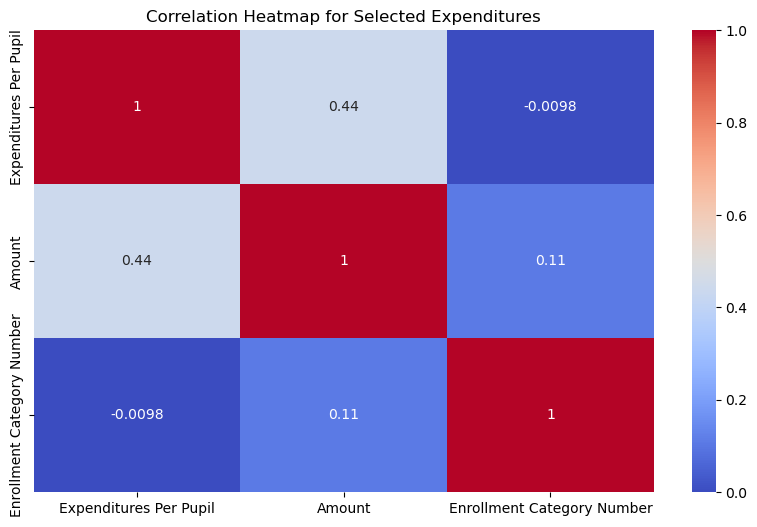

In [79]:
new_Iowa = Iowa_data[['Expenditures Per Pupil', 'Amount', 'Enrollment Category Number']]

# Calculate the correlation matrix for the selected columns
corr_matrix = new_Iowa.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))  # Optional: adjust the figure size
sns.heatmap(corr_matrix, vmin=0, vmax=1, annot=True, cmap='coolwarm')  
plt.title('Correlation Heatmap for Selected Expenditures')
plt.show()

Implication: The amount of money and expenditures per pupil are positively correlated. The enrollment category number and the expenditures per pupil arre slightly negatively correlated, but it is hard to say that there's a relationship between the two variables. 